In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN,NaN


In [5]:
df.shape

(145460, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [7]:
print(*df.columns,sep='\n')

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


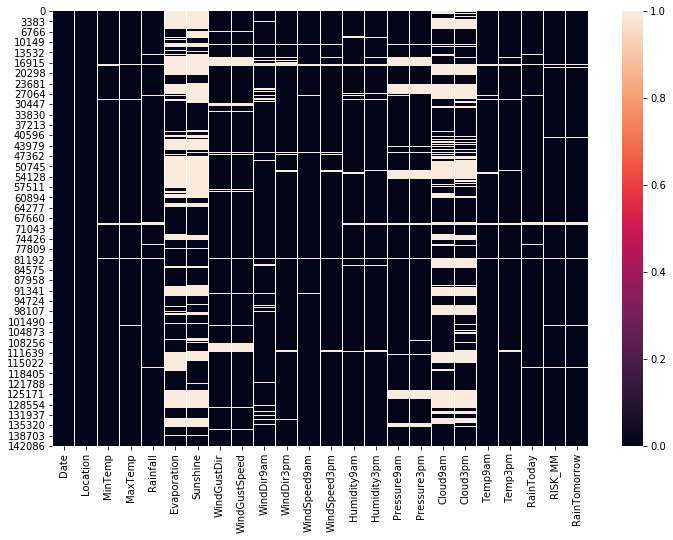

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

In [10]:
df=df.dropna(how='any')


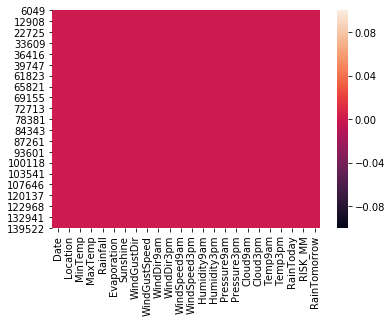

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
102959,2010-02-11,Nuriootpa,22.9,30.9,0.0,9.6,6.2,SW,41.0,WNW,...,53.0,1013.6,1013.1,7.0,7.0,26.5,26.5,No,0.0,No
13510,2013-03-13,Moree,18.5,29.9,0.0,8.8,11.1,SSE,37.0,E,...,26.0,1013.8,1009.3,1.0,2.0,21.7,28.9,No,0.0,No
140142,2011-05-28,Darwin,17.7,29.8,0.0,6.2,10.5,E,35.0,ESE,...,40.0,1014.2,1011.3,6.0,6.0,21.0,28.6,No,0.0,No
137953,2014-04-25,AliceSprings,10.5,29.8,0.0,6.6,11.1,ENE,28.0,ESE,...,21.0,1016.5,1011.9,1.0,2.0,19.4,28.6,No,0.0,No
101844,2015-07-18,MountGambier,3.0,10.7,1.4,0.8,1.3,ESE,20.0,NNE,...,63.0,1033.0,1031.9,6.0,8.0,7.1,10.0,Yes,0.0,No


In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


In [14]:
df = df.drop(['Location','Date','Evaporation','Sunshine', 'Cloud9am','Cloud3pm','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm'], axis=1)

In [15]:
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
21805,18.3,22.5,3.4,96.0,89.0,1012.5,1012.3,19.6,20.1,Yes,0.2,No
139460,19.3,31.4,0.0,83.0,36.0,1013.6,1009.4,24.6,30.8,No,0.0,No
88049,23.8,31.8,0.6,74.0,61.0,1011.8,1008.4,28.1,31.5,No,0.2,No
40076,10.9,19.7,6.6,98.0,50.0,1035.9,1033.2,13.3,18.7,Yes,0.0,No
12695,13.0,24.7,0.0,81.0,51.0,1022.5,1019.3,18.9,23.6,No,0.0,No


In [16]:
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [17]:
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
103090,6.5,15.5,0.0,82.0,69.0,1035.2,1032.1,11.0,14.0,0,0.0,0
100951,15.1,24.3,0.0,58.0,93.0,1005.9,1004.6,20.8,17.3,0,0.6,0
101932,4.4,26.3,0.0,99.0,28.0,1022.7,1018.2,9.3,25.0,0,0.0,0
41484,7.5,22.0,0.0,51.0,29.0,1020.6,1016.5,13.9,20.6,0,0.0,0
86351,22.6,30.1,0.2,65.0,64.0,1011.1,1008.6,27.2,28.6,0,0.0,0


In [18]:
# Exploratory Data Analysis

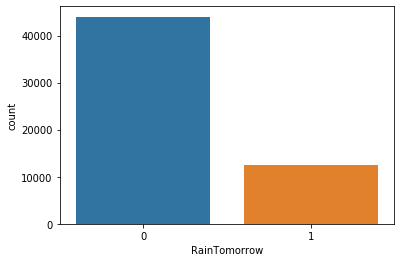

In [19]:
sns.countplot(df.RainTomorrow)

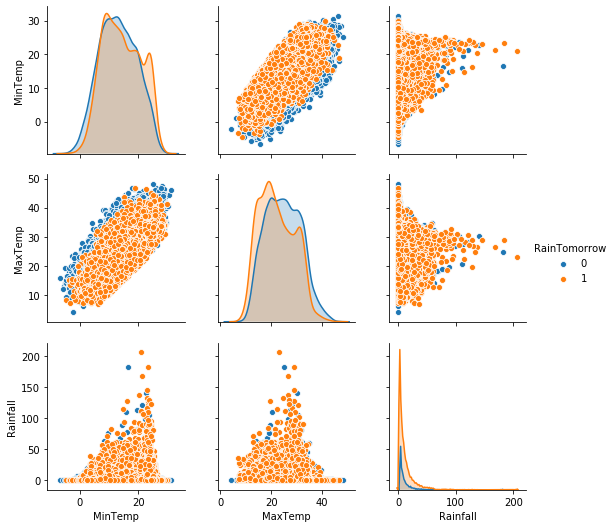

In [20]:
sns.pairplot(df,vars=['MinTemp','MaxTemp','Rainfall'],hue='RainTomorrow')

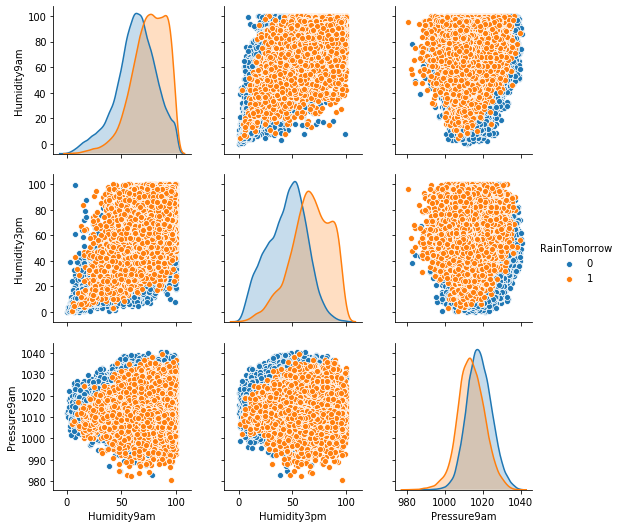

In [21]:
sns.pairplot(df,vars=['Humidity9am','Humidity3pm','Pressure9am'],hue='RainTomorrow')

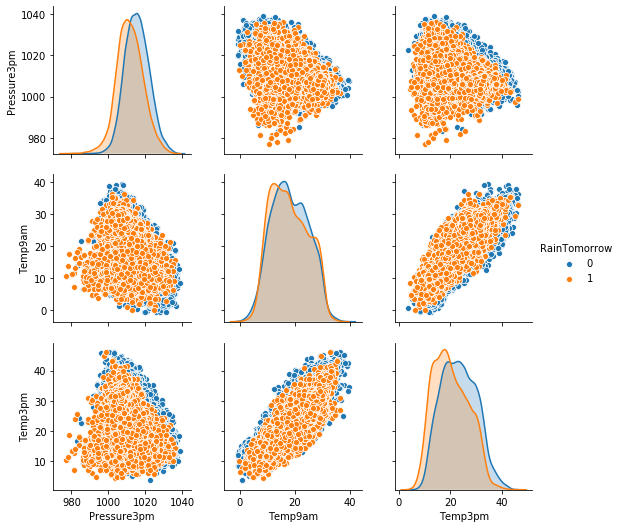

In [22]:
sns.pairplot(df,vars=['Pressure3pm','Temp9am','Temp3pm'],hue='RainTomorrow')

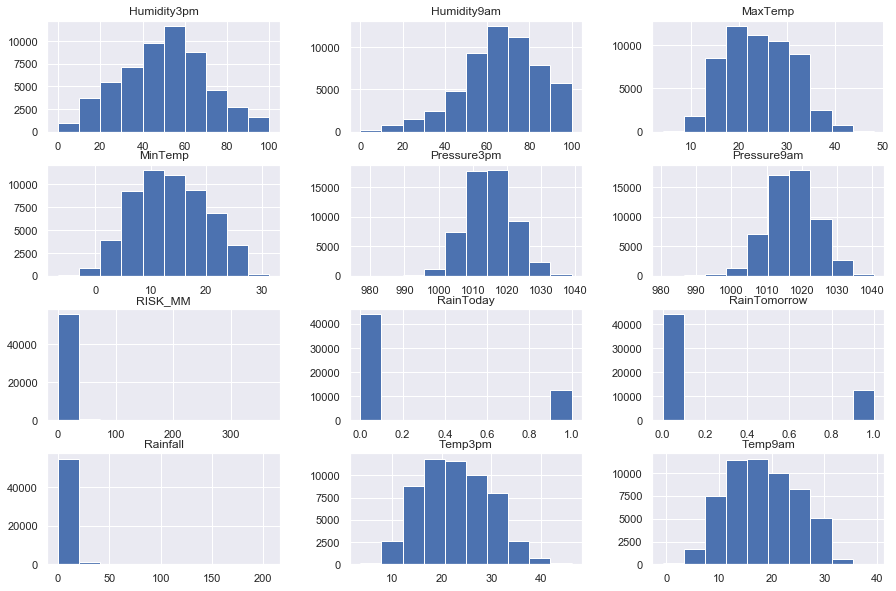

In [23]:
sns.set()
df.hist(figsize=(15,10))
plt.show()

In [24]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.749687,0.110800,-0.174991,0.070827,-0.475661,-0.495577,0.906295,0.727222,0.048953,0.142357,0.087428
MaxTemp,0.749687,1.000000,-0.069981,-0.495781,-0.448116,-0.350980,-0.451691,0.893387,0.984841,-0.221810,-0.016697,-0.147467
Rainfall,0.110800,-0.069981,1.000000,0.263625,0.277625,-0.180606,-0.137302,0.013713,-0.074627,0.550515,0.304971,0.254342
Humidity9am,-0.174991,-0.495781,0.263625,1.000000,0.685697,0.114575,0.172972,-0.423598,-0.487758,0.379451,0.181268,0.271033
Humidity3pm,0.070827,-0.448116,0.277625,0.685697,1.000000,-0.063454,0.024109,-0.151614,-0.497245,0.385440,0.313669,0.455358
Pressure9am,-0.475661,-0.350980,-0.180606,0.114575,-0.063454,1.000000,0.961538,-0.443410,-0.310774,-0.186848,-0.171706,-0.254816
Pressure3pm,-0.495577,-0.451691,-0.137302,0.172972,0.024109,0.961538,1.000000,-0.500509,-0.421318,-0.104103,-0.171046,-0.230418
Temp9am,0.906295,0.893387,0.013713,-0.423598,-0.151614,-0.443410,-0.500509,1.000000,0.870620,-0.096946,0.071622,-0.018179
Temp3pm,0.727222,0.984841,-0.074627,-0.487758,-0.497245,-0.310774,-0.421318,0.870620,1.000000,-0.228515,-0.039749,-0.183586
RainToday,0.048953,-0.221810,0.550515,0.379451,0.385440,-0.186848,-0.104103,-0.096946,-0.228515,1.000000,0.217972,0.309098


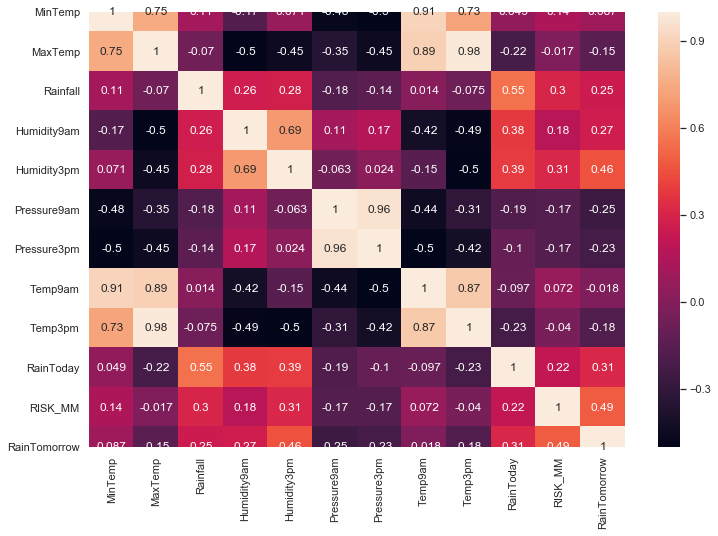

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [26]:
# Model Building 

In [27]:
y=df.RainTomorrow
x=df.drop('RainTomorrow',axis=1)

In [28]:
x.shape, y.shape

((56420, 11), (56420,))

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [30]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [31]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
prediction=logreg.predict(x_test)

In [32]:
print('Intercept: ',logreg.intercept_)
print('Coefficient: ',logreg.coef_)

Intercept:  [4.86626011]
Coefficient:  [[ 3.09168888e-03  2.15558844e-01  5.44378962e-03  1.90735137e-02
   2.49476565e-01  9.50703048e-02 -2.70007696e-01  4.80420657e-02
  -3.43757975e-01  2.17407416e-02  3.88496632e+01]]


In [33]:
print('Accuracy Score: ',accuracy_score(y_test,prediction))

Accuracy Score:  0.9945054945054945


In [34]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8774
           1       1.00      0.98      0.99      2510

    accuracy                           0.99     11284
   macro avg       1.00      0.99      0.99     11284
weighted avg       0.99      0.99      0.99     11284



In [35]:
cm=confusion_matrix(y_test,prediction)
cm

array([[8774,    0],
       [  62, 2448]], dtype=int64)

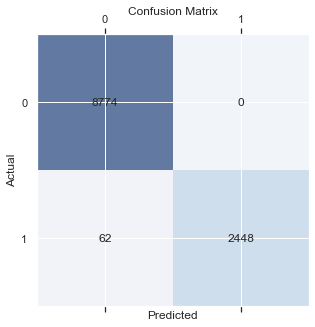

In [36]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
        

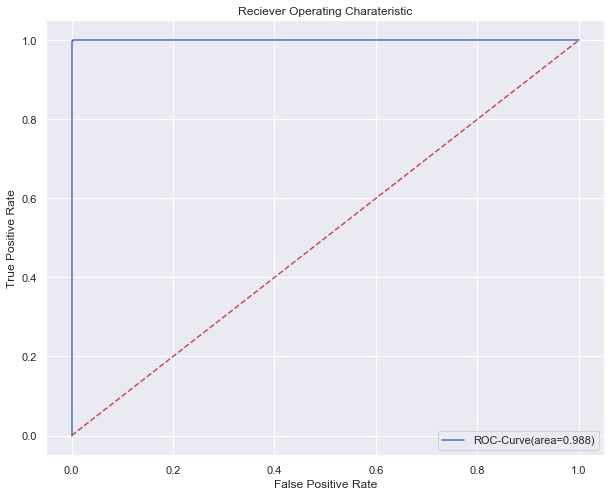

In [37]:
plt.figure(figsize=(10,8))
auc=roc_auc_score(y_test,prediction)
fpr,tpr,thr=roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC-Curve(area=%0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Charateristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()